In [2]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

size_ = 64

model = Sequential()

model.add(Conv2D(128, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 3, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

Using TensorFlow backend.


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         819456    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)        

In [5]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('dataset/training', target_size = (size_, size_), batch_size = 50, class_mode = 'categorical')
test_data = test.flow_from_directory('dataset/testing', target_size = (size_, size_), batch_size = 50, class_mode = 'categorical')

Found 7200 images belonging to 3 classes.
Found 1800 images belonging to 3 classes.


In [6]:
history=model.fit_generator(train_data, steps_per_epoch = 100, epochs = 50, validation_data = test_data, validation_steps = 100)

Epoch 1/50
100/100 [==============================] - 40s 395ms/step - loss: 0.9277 - categorical_accuracy: 0.5850 - val_loss: 0.6338 - val_categorical_accuracy: 0.6840
Epoch 2/50
100/100 [==============================] - 17s 167ms/step - loss: 0.5704 - categorical_accuracy: 0.7242 - val_loss: 0.5553 - val_categorical_accuracy: 0.7400
Epoch 3/50
100/100 [==============================] - 17s 169ms/step - loss: 0.4851 - categorical_accuracy: 0.7688 - val_loss: 0.3645 - val_categorical_accuracy: 0.8086
Epoch 4/50
100/100 [==============================] - 17s 168ms/step - loss: 0.4463 - categorical_accuracy: 0.7798 - val_loss: 0.3602 - val_categorical_accuracy: 0.7802
Epoch 5/50
100/100 [==============================] - 17s 167ms/step - loss: 0.3916 - categorical_accuracy: 0.8194 - val_loss: 0.3827 - val_categorical_accuracy: 0.8024
Epoch 6/50
100/100 [==============================] - 17s 168ms/step - loss: 0.3927 - categorical_accuracy: 0.8276 - val_loss: 0.3906 - val_categorical_acc

100/100 [==============================] - 17s 167ms/step - loss: 0.0046 - categorical_accuracy: 0.9988 - val_loss: 0.5723 - val_categorical_accuracy: 0.8970
Epoch 50/50
100/100 [==============================] - 17s 166ms/step - loss: 0.0043 - categorical_accuracy: 0.9992 - val_loss: 0.7050 - val_categorical_accuracy: 0.8960


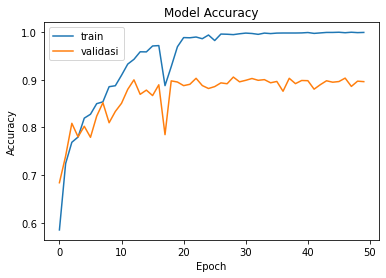

In [7]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

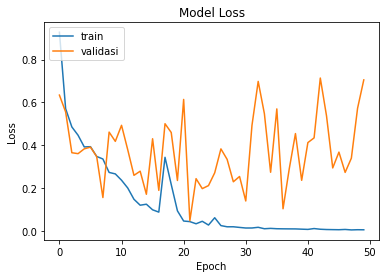

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

In [22]:
a = "validasi/brownspot.png"
b = "validasi/bacterial.jpg"

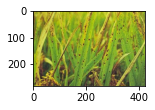

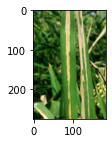

In [23]:

def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

tampilkan_(a)
tampilkan_(b)

In [24]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'Bacterial_leaf_blight', 1: 'Brown_spot', 2: 'Health'}


In [34]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(a, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", a, "] diprediksi sebagai", nama_train_data[hasil[0]], ".")

File gambar [ validasi/brownspot.png ] diprediksi sebagai Brown_spot .


In [33]:
img = image.load_img(b, target_size = (size_, size_))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

hasil = model.predict_classes(img)
print("File gambar [", b, "] diprediksi sebagai", nama_train_data[hasil[0]], ".")

File gambar [ validasi/bacterial.jpg ] diprediksi sebagai Bacterial_leaf_blight .


In [47]:
model.save('DeteksiPenyakitPadi.hdf5') 

In [48]:
import tensorflow as tf

keras_file = tf.keras.models.load_model('DeteksiPenyakitPadi.hdf5')

# Convert to TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(keras_file)
tflite_model = converter.convert()
open("DeteksiPenyakitPadi.tflite", "wb").write(tflite_model)

7322228